# Lab #1. Numpy, Pandas and Matplotlib

### Important: do not delete any blocks
#### But you may add as many as you need.

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Make sure to install these modules before you start.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.



#### Evaluation

- Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 
- There are **Questions** in the tasks, don't skip them. If you skip a question, value of the task becomes 0. 
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2021_lab01_GroupNumber_Surname_Name.ipynb`, for example 
    - `2021_lab01_404_Sheipak_Sviat.ipynb`
    - `2021_lab01_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2021_lab01_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2021-09-29 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/Y9kRkFcH8lOb9w

## Part 1. Numpy and plots [2.5 points]

`numpy` is a module that helps you to deal with vectors (matrices and tensors too) and it has a lot of cool features.

Firstly, let's import it:

In [1]:
import numpy as np

Vectors in numpy are called **arrays**. Create an array from a list:

In [2]:
my_list = [1, 2, 3, 4, 5, 6]
my_vector = np.array(my_list)
print(my_list)
print(my_vector)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


You can reshape them:

In [3]:
my_vector = my_vector.reshape((2, 3))
print(my_vector.shape)
print(my_vector)

my_vector = my_vector.reshape((6, 1))
print(my_vector.shape)
print(my_vector)

(2, 3)
[[1 2 3]
 [4 5 6]]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


You don't even have to state all of dimensions explicitly, since they can be derived (use -1):

In [4]:
my_vector = my_vector.reshape((3, -1))
print(my_vector.shape)
print(my_vector)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Slices!

In [5]:
print(my_vector[0, 1])
print(my_vector[:, 1])
print(my_vector[:2])
print(my_vector[:2,::-1])

2
[2 4 6]
[[1 2]
 [3 4]]
[[2 1]
 [4 3]]


Arithmetic operations:

In [6]:
vector_a = np.arange(10)
print(vector_a)
print(vector_a - 10)
print(vector_a * 100)
print(np.array([5, 4]) + np.array([1, 6]))
print(np.array([5, 4]) * np.array([1, 6]))

[0 1 2 3 4 5 6 7 8 9]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[  0 100 200 300 400 500 600 700 800 900]
[ 6 10]
[ 5 24]


**Task 1. Basic arrays [0.5 point]** 

Create a 2-dimensional numpy array `x` of 100 by 2 shape filled with random numbers from $U[0, 1]$

In [7]:
x = np.array([np.random.uniform(0, 1, 2) for i in range(100)])

assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

0.5373418128378462

Calculate averages: row-wise, column-wise and total. Use `np.mean` and `axis` parameter. Then `print` the `mean_total` rounded to 3 digits after comma (using `format` method).

In [96]:
mean_by_row = np.mean(x, axis=1)
mean_by_col = np.mean(x, axis=0)
mean_total = np.mean(x)

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {:.3f}".format(mean_total))

The total mean is 0.490


**Task 2. Sort 2-dim array [0.5 point]** 

Create a 1-dimensional numpy array `y` of 100 random **integers** from $U\{0, 1, 2, 3\}$

In [97]:
y = np.array([np.random.choice([0, 1, 2, 3], 100)]).flatten()

assert y.shape == (100,)

Import class `Counter` from `collections` module.

In [98]:
from collections import Counter

In [99]:
basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)

In [100]:
print(container_A, container_B, container_C)

{2: 18, 1: 25, 3: 21, 0: 36} [(2, 18), (1, 25), (3, 21), (0, 36)] [[ 2 18]
 [ 1 25]
 [ 3 21]
 [ 0 36]]


Here are three data structures.

**Question:** What is the type of `container_A`? What is the type of `container_B`? What is the type of the elements of `container_C`?

**Solution:** Let's have a look at the type of each container:

In [101]:
print(type(container_A), type(container_B), type(container_C), type(container_C[0]))

<class 'dict'> <class 'list'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


**Your answer:** container_A has a type 'dict' (dictionary), container_B - 'list' and container_C - 'numpy.ndarray', elements of container_C also is a 'numpy.ndarray'

Use `np.sort` to order elements of `container_C` acsending by their first coordinate (pay attention to `axis` parameter).

***COMMENT***: Sorry, can't do it with np.sort, only np.argsort ;(

In [102]:
counter_values = container_C[np.argsort(container_C, axis=0)[:, 0]]

assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


**Task 3. Basic barplot [0.5 points]** 

Plot a barplot representing how many times each value `0, 1, 2, 3` is encounterd in `y`. Do not forget to:
- Add title to the plot
- Label the axes
- Specify x-ticks 

You may use `counter_values` you have obtained in a Task 2.

In [103]:
import matplotlib.pyplot as plt

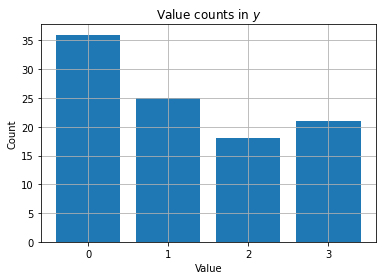

In [104]:
plt.title("Value counts in $y$")
plt.bar(counter_values[:, 0], counter_values[:, 1])
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

**Task 4. Concat two numpy arrays [0.5 point]**

You have:
- `x`: 100 $\times$ 2
- `y`: 100

Concatenate them horizontally to get `z`: 100 $\times$ 3

In [105]:
z = np.concatenate((x, y.reshape((100,1))), axis=1)

assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()

**Task 5. Basic Scatter Plot [0.5 point]**

You have:
- `z`: 100 $\times$ 3

Each row of `z` consists of 3 numbers. Build a scatter plot where each row is represented by a dot: first and second number are coordinates and third number corresponds to dot colour. Don't forget to add a legend.

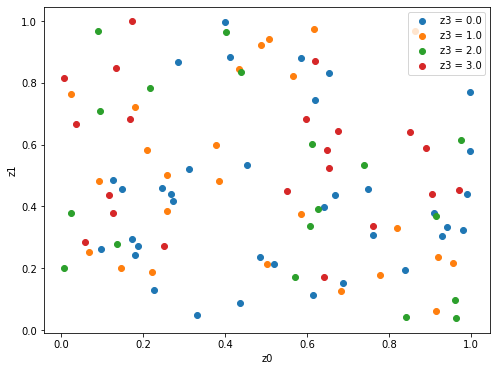

In [106]:
plt.figure(figsize=(8, 6))
colors = np.unique(z[:, 2])

for col in colors:
    dots = z[z[:, 2] == col]
    plt.scatter(dots[:, 0], dots[:, 1], label="z3 = {}".format(col))
    
plt.legend(loc="upper right")
plt.xlabel('z0')
plt.ylabel('z1')
plt.show()

# Part 2. Moscow houses [4.5 points]

In this part we start to work with datasets and `pandas` module.
You will need to download `moscow_coords.csv` file. It provides a coordinate and an address for some houses in Moscow. The original source of the data: https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=445

In [107]:
import pandas as pd

In [108]:
coords_db = pd.read_csv("data/moscow_coords.csv")

In [109]:
coords_db.head(10)

,ADDRESS,coor_x,coor_y
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510
5,"город Москва, улица Вострухина, дом 5А",37.797659,55.720022
6,"город Москва, улица Космонавта Волкова, дом 10...",37.514713,55.815373
7,"город Москва, Балтийская улица, дом 8, строени...",37.517288,55.809580
8,"город Москва, улица Головачёва, дом 3, корпус 2",37.805437,55.675219
9,"город Москва, Климентовский переулок, дом 1, с...",37.631972,55.740967


In [110]:
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))

<class 'pandas.core.frame.DataFrame'>
(406934, 3)
Index(['ADDRESS', 'coor_x', 'coor_y'], dtype='object')
<class 'pandas.core.series.Series'>


**Task 1. Address analysis [0.5 point]**

As we can see, the dataset has 3 columns: `ADDRESS`, `coor_x` and `coor_y`.
Let's focus on `ADDRESS` - the datatype of this column is `str`.

Your task is to find and describe addresses that inlcude word `город`* at least two times.

**город* - *city* in russian

Let's do it step by step:
1. Implement a function `tokenize_address`, that takes a string

* casts string to lowercase;
    
* removes all `,` and `.` symbols;
    
* splits string into a `list` of strings; separation symbol is a whitespace ` `.
    
2. Implement a function `count_a_token`, that takes a list of strings and counts number of entries of a particular token.

In [111]:
def tokenize_address(input_string):
    """
    input:
    - input_string: str
    output:
    - list<str> - string split into tokens
    """
    lower_case = input_string.lower()
    comma_free_str = lower_case.replace(',', '')
    point_free_str = comma_free_str.replace('.', '')
    tokenized_str = point_free_str.split()
    
    return tokenized_str

assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

In [112]:
def count_a_token(token_list, lookup_token):
    """
    input:
    - token_list: list<str>
    - lookup_token: str
    output:
    - int - how many times lookup_token is encountered in token_list
    """
    result = token_list.count(lookup_token)
    
    return result

In [113]:
test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")

['город', 'москва', 'улица', 'космонавта', 'волкова', 'дом', '10']
1
Seems fine!


Now it is time add new column `city_token_cnt` to the dataset. Values in this column should be a result of applying two functions above to a `coords_db["ADDRESS"]`. Note that `coords_db["ADDRESS"]` is a `pandas.Series` object and it has method `apply`.

In [114]:
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))

In [115]:
coords_db.head()

,ADDRESS,coor_x,coor_y,city_token_cnt
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,1
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,1
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,1
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,1
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,1


And the final step: let's do a `groupby` by column `city_token_cnt` to find out how many addresses have token `город` two times or more.

In [116]:
stats = coords_db.groupby(by=['city_token_cnt'])

In [117]:
stats.count()

,ADDRESS,coor_x,coor_y
city_token_cnt,,,
0,1790,1790,1790
1,394061,394061,394061
2,11083,11083,11083


**Question**: how many addresses have token `город` two times or more?

**Your answer**: 11083

**Task 2. Count 2-grams [1 point]**

For a sequence of tokens `["a_1", "a_2", ..., "a_N"]` **n-gram** is a subsequence of **n** consecutive tokens.

For example: given a sequence of tokens `["a", "b", "c", "d"]` it has:
- Four unigrams: `["a"], ["b"], ["c"], ["d"]`
- Three 2-grams: `["a", "b"], ["b", "c"], ["c", "d"]`
- Two 3-grams: `["a", "b", "c"], ["b", "c", "d"]`
- One 4-gram: `["a", "b", "c", "d"]`

Your task is two find all 2-grams that start with `город` token and count their occurences in all addresses.

Firstly, impement a function `get_n_grams`:

In [118]:
def get_n_grams(input_tokens, n):
    """
    input:
    - input_tokens: list<str>
    - n: int, size of n-grams
    output:
    - list<list<str>> - list of n-grams
    """
    input_len = len(input_tokens)
    ngrams = []
    idx = 0
    while idx+n <= input_len:
        ngrams.append(input_tokens[idx:idx+n])
        idx += 1
    return ngrams

In [119]:
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

OK, seems fine!


Secondly, define a function that will filter list of n-grams by the first element of an n-gram:

In [120]:
def filter_n_grams(n_grams, lookup_token):
    """
    input:
    - n_grams: list<list<str>>
    - lookup_token: str
    output:
    - list<list<str>> - sublist of n-grams first token of which is equal to lookup_token
    """
    result = list(filter(lambda x: x[0] == lookup_token, n_grams))
    return result

In [121]:
assert filter_n_grams([
    ["a", "b"], 
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ], 
    "a") == [["a", "b"], ["a", "c"]] 

print("Seems fine!")

Seems fine!


Back to our dataset. Leave rows with `city_token_cnt >= 2`

In [122]:
sub_db = coords_db[coords_db['city_token_cnt'] >= 2]
print(sub_db.shape)
sub_db.head(5)

(11083, 4)


,ADDRESS,coor_x,coor_y,city_token_cnt
40,"город Москва, город Зеленоград, корпус 1212",37.193861,55.992106,2
193,"город Москва, город Зеленоград, корпус 1459",37.162394,55.984514,2
220,"город Москва, город Зеленоград, корпус 1215",37.190049,55.994432,2
282,"город Москва, город Зеленоград, корпус 1110",37.188728,55.999289,2
363,"город Москва, город Зеленоград, корпус 115",37.204655,56.008116,2


Let's build a dict that contains counts of 2-grams: 
```
{
    "город x": cnt_x,
    "город y": cnt_y,
     ...
    "город N": cnt_N
      
}
```
Note that key is a string `"город x"`, not a list `["город", "x"]` - list cannot be a key in a dict.

In [123]:
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = address.split()
    n_grams = get_n_grams(tokens, n=2)
    filtered_n_grams = filter_n_grams(n_grams, lookup_token='город')
    for x in filtered_n_grams:
        key = ' '.join(x)[:-1]
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1

In [124]:
counter_dict

{'город Москва': 11083,
 'город Зеленоград': 3579,
 'город Московский': 1351,
 'город Троицк': 4193,
 'город Щербинка': 1959,
 'город Зеленогра': 1}

***COMMENT***: Oh, seems like there is a misspell "Зеленогра" in data set =)

**Task 3. Garden Ring houses scatterplot [1 points]**

We need to find houses that are located near the Garden Ring. There can be a lot of definitions of *near* - but in our case *near* means inside a polygon. Inner and outer polygon points can be found in files: `inner_poly.csv` and `outer_poly.csv` respectively.

In [125]:
inner_poly = pd.read_csv("data/inner_poly.csv", header=None).values
outer_poly = pd.read_csv("data/outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

Let's scatter plot the points:

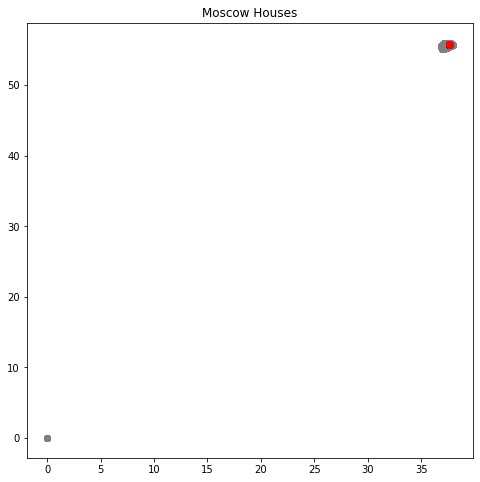

In [126]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Ooooops seems a bit wrong. 

**Question**: why does the plot look so strange? How to fix it?

**Your answer:** Because the main part of our values is in the upper right corner, while we have outliers around 0. We should remove the outliers.

Now fix the `house_points` array, remove a set of points in the bottom left corner:

In [39]:
house_points = np.array([x for x in house_points if x.any() != 0])

And scatter it again:

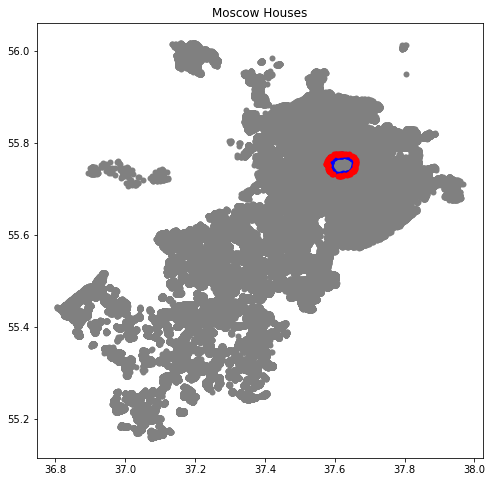

In [40]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Let's do a little zoom-in: filter `house_points` and leave points in some **small square** near the garden ring. The choice of the size of the square is up to you, but the outer poly should be inside this square.

I have already defined a small square, but you can change its sizes.

In [41]:
lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    result = [item for item in input_array if item[0] >= lower_x and item[0] <= upper_x and item[1] >= lower_y 
             and item[1] <= upper_y]
    return np.array(result)

In [42]:
small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)

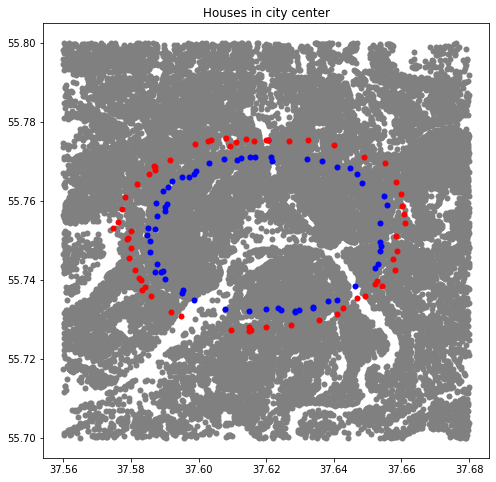

In [43]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

**Task 4. Houses in a polygon [2 points]**

Implement a function, that by two coordinates of a point and list of coordinates of the polygon tells whether this point is inside a polygon or not.

You may define as many others functions as you want.

*Hint: the polygons may be regarded as convex.*

**Question:** what algorithm to decide whether the point is inside will you implement? Why is it supposed to work?

**Your answer:** I used this page https://towardsdatascience.com/is-the-point-inside-the-polygon-574b86472119 as a reference for writing a code.

The main idea is to check if point lies on the same side of all edges of polygon. If it is, than it lies inside the polygon. We can check the side using cross product. But the main trouble is that our polygon isn't convex, for this reason my solution became crutch: i made non-convexity correction (subtracted 7 from number of positive orientations and negative orientations, 7 is an approximate number of edges where convexity is broken, i picked up this value manually). Sorry for bad algorithm :D

In [44]:
def substitute_point_in_line(point, polygon_point1, polygon_point2): 
    result = (point[0] - polygon_point1[0]) * (polygon_point2[1] - polygon_point1[1]) - (point[1] - polygon_point1[1]) * (polygon_point2[0] - polygon_point1[0])
    return result

In [45]:
def point_is_inside(point, polygon_points):
    """
    input:
    - point np.array of (1, 2) shape
    - polygon_points np.array of (N, 2) shape
    output:
    - bool True if point is inside, false if point is outside
    """ 
    positive = 0
    negative = 0

    for i in range(len(polygon_points)):
        point1 = polygon_points[i]
        point2 = polygon_points[(i + 1) % len(polygon_points)]
        product = substitute_point_in_line(point, point1, point2)
        if product > 0:
            positive += 1
        if product < 0:
            negative += 1

    positive -= 7 # non-convexity correction
    negative -= 7 # non-convexity correction
    
    if positive > 0 and negative > 0:
        return False
        
    return True
 

And the final part! 

Scatter plot `small_square_points` again, but with 3 different colours:
- colour 1: points inside inner poly
- colour 2: points outside outer poly
- colour 3: points between inner and outer polys

In [46]:
if_inside_1 = []
for point in small_square_points:
    res = point_is_inside(point, outer_poly)
    if_inside_1.append(res)

if_inside_2 = []
for point in small_square_points:
    res = point_is_inside(point, inner_poly)
    if_inside_2.append(res)

between_points = np.logical_and(if_inside_1, np.logical_not(if_inside_2))

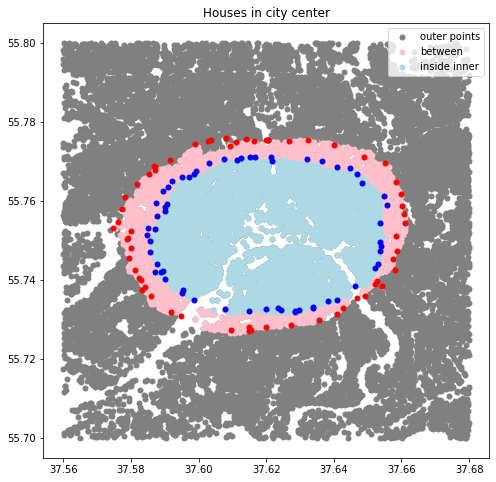

In [47]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey", label='outer points')
plt.scatter(small_square_points[between_points][:, 0], small_square_points[between_points][:, 1], linewidths=0.001, c='pink', label='between')
plt.scatter(small_square_points[if_inside_2][:, 0], small_square_points[if_inside_2][:, 1], linewidths=0.001, c='lightblue', label='inside inner')
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.legend()
plt.show()

**Question:** How many points are there between inner and outer polys?

In [48]:
between_points = np.logical_and(if_inside_1, np.logical_not(if_inside_2))
between_points.sum()

3214

**Your answer:** 3214 points (accurate to convex approximation)

# Part 3. Titanic Dataset - Stats and Plots [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice pecualrities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [50]:
passengers_record = pd.read_csv('data/passengers_record.csv')
survival_info = pd.read_csv('data/survival_info.csv')

assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"

In [51]:
passengers_record.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
survival_info.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [53]:
db = passengers_record.merge(survival_info, on='PassengerId')

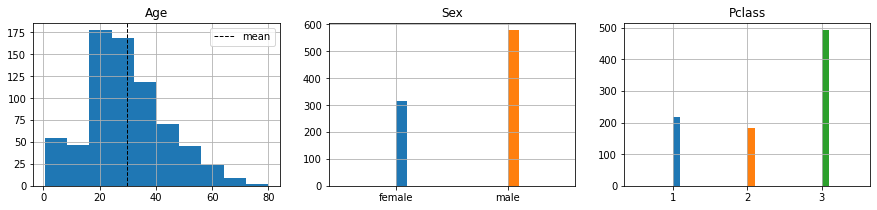

In [54]:
plt.figure(figsize=(15, 3))

plt.subplot(131)
db['Age'].hist()
plt.axvline(db['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean')
plt.title('Age')
plt.legend()

plt.subplot(132)
db.groupby('Sex')['Sex'].hist()
plt.title('Sex')

plt.subplot(133)
db.groupby('Pclass')['Pclass'].hist()
plt.title('Pclass')
plt.xticks([1.0, 2.0, 3.0])
plt.show()

In [55]:
db['Age'].mean()

29.69911764705882

We can see that distribution of Age is bell-like, the mean age is 26.7 years. There were 314 females and 577 males on the Titanic. 216 people were in the first class, 184 people were in the second and other 491 were in the third class. 64 people were 0-10 years old, 115 people - 10-20 years old, 385 people - 20-40 years old, 22 people - 40-60 years old, 177 people - 60-80 years old (watch cells in the task about survival rate below).

In [56]:
print("Amount of people by {}".format(db.groupby('Sex')['Sex'].count()))
print("Amount of people by {}".format(db.groupby('Pclass')['Pclass'].count()))

Amount of people by Sex
female    314
male      577
Name: Sex, dtype: int64
Amount of people by Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


Oldest passangers in each class:

In [57]:
db.groupby('Pclass')[['Age', 'Name']].max()

,Age,Name
Pclass,,
1,80.0,"Young, Miss. Marie Grice"
2,70.0,"del Carlo, Mr. Sebastiano"
3,74.0,"van Melkebeke, Mr. Philemon"


Youngest passangers in each class:

In [58]:
db.groupby('Pclass')[['Age', 'Name']].min()

,Age,Name
Pclass,,
1,0.92,"Allen, Miss. Elisabeth Walton"
2,0.67,"Abelson, Mr. Samuel"
3,0.42,"Abbing, Mr. Anthony"


Compare survival rates between classes:

In [59]:
db.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

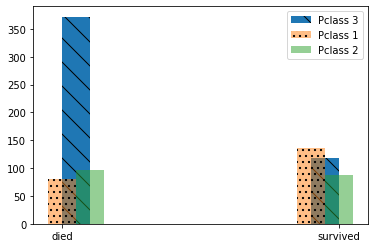

In [60]:
plt.hist(db[db['Pclass'] == 3]['Survived'], align='mid', hatch='\\', label='Pclass 3')
plt.hist(db[db['Pclass'] == 1]['Survived'], align='left', hatch='..', label='Pclass 1', alpha=0.5)
plt.hist(db[db['Pclass'] == 2]['Survived'], align='right', hatch='', label='Pclass 2', alpha=0.5)
plt.xticks([0.0, 1.0], ['died', 'survived'])
plt.legend()

We can see that the biggest survival rate in the first class.

Compare survival rates between genders:

In [61]:
db.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

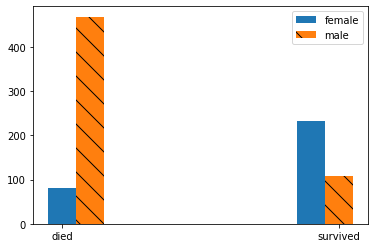

In [62]:
plt.hist(db[db['Sex'] == 'female']['Survived'], align='left', label='female')
plt.hist(db[db['Sex'] == 'male']['Survived'], align='right', hatch='\\', label='male')
plt.xticks([0.0, 1.0], ['died', 'survived'])
plt.legend()
plt.show()

We can see that survival rate for female is bigger than for male.

To compare survival rate between age groups let's make 4 age groups: 0-10, 10-20, 20-40, 40-60, 60-80 (max age at the Titanic). Also we must drop people with unkown age (drop NaN values).

In [63]:
bins = [0, 10, 20, 40, 60, 80]
age_group = np.digitize(db['Age'], bins, right=True)
db['Age group'] = age_group

db[db['Age'].notna()].groupby('Age group')['Survived'].mean()

Age group
1    0.593750
2    0.382609
3    0.397403
4    0.390625
5    0.227273
Name: Survived, dtype: float64

In [64]:
print("Amount of people by {}".format(db.groupby('Age group')['Age group'].count()))

Amount of people by Age group
1     64
2    115
3    385
4    128
5     22
6    177
Name: Age group, dtype: int64


We can see that the biggest survival rate is in the group 0-10 years (children).

**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

In [65]:
db.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

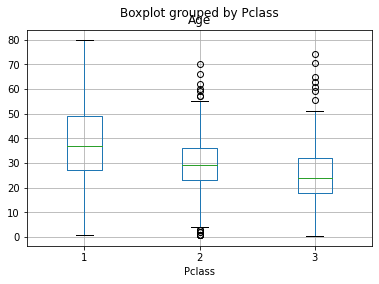

In [66]:
db.boxplot(column=['Age'], by='Pclass')

**Answer:** Looking at the values and boxplots above, we can't say that average age per class are equal.

To use T-test we must have a normal distributed vales. Let's check it using D’Agostino and Pearson’s test (also drop NaN values before it):

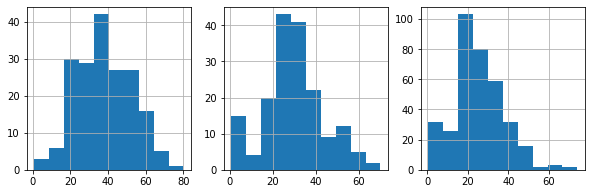

In [67]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
db[db['Pclass'] == 1]['Age'].hist()
plt.subplot(132)
db[db['Pclass'] == 2]['Age'].hist()
plt.subplot(133)
db[db['Pclass'] == 3]['Age'].hist()
plt.show()

In [68]:
from scipy import stats

for i in range(1,4):
    print(stats.normaltest(db[db['Pclass'] == i]['Age'].dropna()))

NormaltestResult(statistic=1.6809586852884995, pvalue=0.4315036357542328)
NormaltestResult(statistic=1.1558018368785472, pvalue=0.561074873262309)
NormaltestResult(statistic=21.119072465384342, pvalue=2.5944880976350556e-05)


We can see that age distribution in pclass 3 didn't pass the test and we reject the hypothesis about its normality. For this reason we can't use T-test to check an equality of averages.

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table of plots.

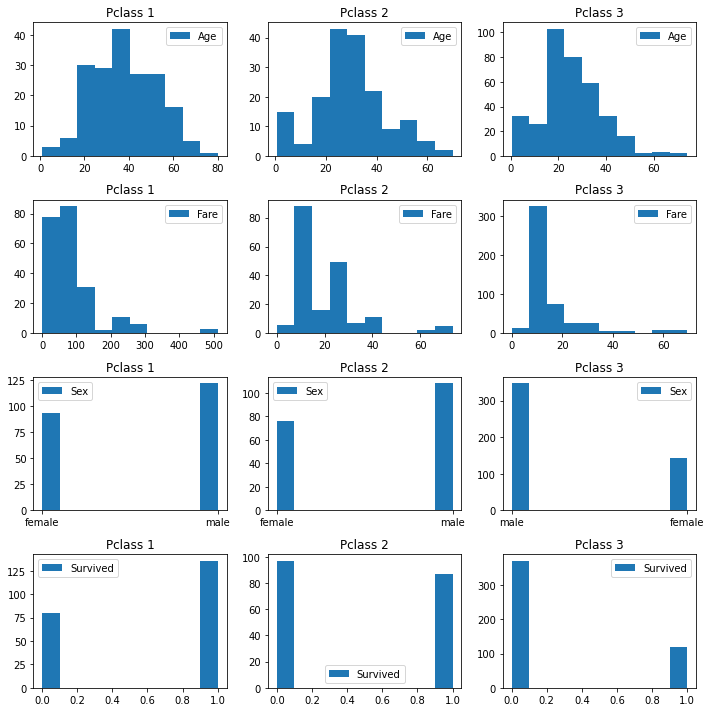

In [69]:
plt.figure(figsize=(10, 10))
columns = np.unique(db['Pclass'])
rows = ['Age', 'Fare', 'Sex', 'Survived']
idx = 1

n_cols = np.size(columns)
n_rows = np.size(rows)

for row in rows:
    for col in columns:
        plt.subplot(n_rows, n_cols, idx)
        plt.hist(db[db['Pclass'] == col][row], label=row)
        plt.title('Pclass {}'.format(col))
        plt.legend()
        idx += 1

plt.tight_layout()
plt.show()

**Task 4. [1 point]**

Find 5 most common **surnames** in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [70]:
surnames = db['Name'].apply(lambda x: x.split()[0])
surnames.value_counts()[:5]

Andersson,    9
Sage,         7
Goodwin,      6
Johnson,      6
Skoog,        6
Name: Name, dtype: int64

**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

In [71]:
db_dropped = db.dropna()

In [72]:
db.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
Age group        0
dtype: int64

In [73]:
db_dropped.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
Age group      0
dtype: int64

***Answer***: We can see that there are no any NaN values now (cells below). Let's have a look at the data:

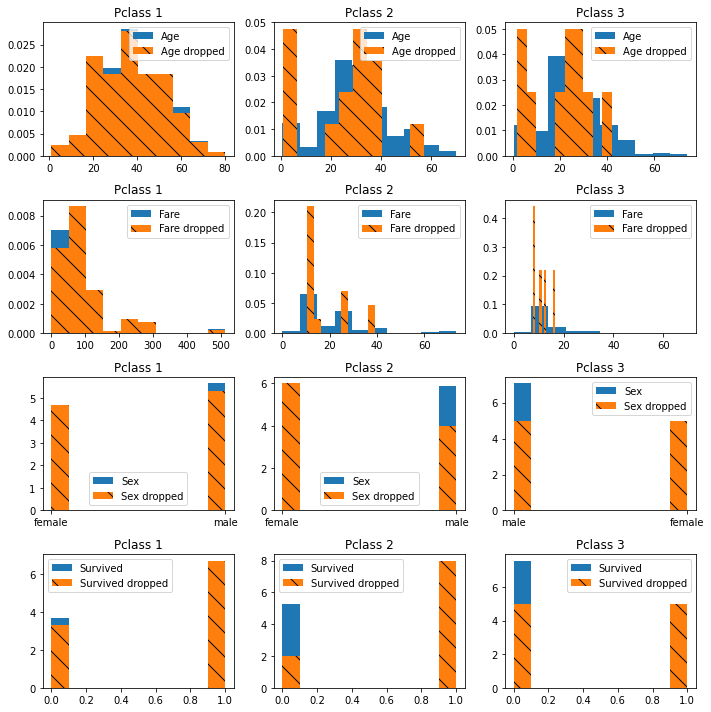

In [74]:
plt.figure(figsize=(10, 10))
columns = np.unique(db['Pclass'])
rows = ['Age', 'Fare', 'Sex', 'Survived']
idx = 1

n_cols = np.size(columns)
n_rows = np.size(rows)

for row in rows:
    for col in columns:
        plt.subplot(n_rows, n_cols, idx)
        plt.hist(db[db['Pclass'] == col][row], label=row, density=True)
        plt.hist(db_dropped[db_dropped['Pclass'] == col][row], label='{} dropped'.format(row),
                 density=True, hatch='\\')
        plt.title('Pclass {}'.format(col))
        plt.legend()
        idx += 1

plt.tight_layout()
plt.show()

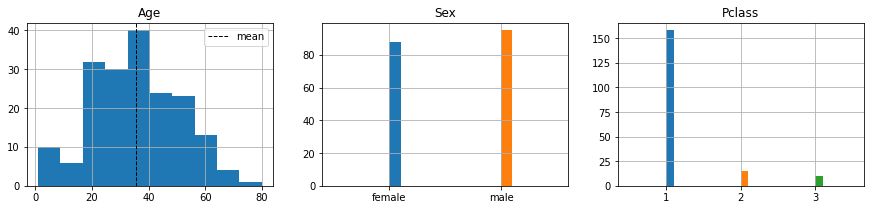

In [75]:
plt.figure(figsize=(15, 3))

plt.subplot(131)
db_dropped['Age'].hist()
plt.axvline(db_dropped['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean')
plt.title('Age')
plt.legend()

plt.subplot(132)
db_dropped.groupby('Sex')['Sex'].hist()
plt.title('Sex')

plt.subplot(133)
db_dropped.groupby('Pclass')['Pclass'].hist()
plt.title('Pclass')
plt.xticks([1.0, 2.0, 3.0])
plt.show()

In [76]:
print("Amount of people by {}".format(db_dropped.groupby('Sex')['Sex'].count()))
print("Amount of people by {}".format(db_dropped.groupby('Pclass')['Pclass'].count()))

Amount of people by Sex
female    88
male      95
Name: Sex, dtype: int64
Amount of people by Pclass
1    158
2     15
3     10
Name: Pclass, dtype: int64


In [77]:
db_dropped.groupby('Pclass')[['Age', 'Name']].max()

,Age,Name
Pclass,,
1,80.0,"Young, Miss. Marie Grice"
2,57.0,"Webber, Miss. Susan"
3,42.0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)"


In [78]:
db_dropped.groupby('Pclass')[['Age', 'Name']].min()

,Age,Name
Pclass,,
1,0.92,"Allen, Miss. Elisabeth Walton"
2,1.00,"Ball, Mrs. (Ada E Hall)"
3,2.00,"Humblen, Mr. Adolf Mathias Nicolai Olsen"


In [79]:
db_dropped.groupby('Pclass')['Survived'].mean()

Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64

In [80]:
bins = [0, 10, 20, 40, 60, 80]
age_group = np.digitize(db_dropped['Age'], bins, right=True)
db_dropped.loc[:, 'Age group'] = age_group

db_dropped[db_dropped['Age'].notna()].groupby('Age group')['Survived'].mean()

/Users/anastasialavruhina/intro_ml_2021/homeworks/env/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Age group
1    0.800000
2    0.789474
3    0.752809
4    0.563636
5    0.200000
Name: Survived, dtype: float64

In [81]:
db_dropped.groupby('Sex')['Survived'].mean()

Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64

We can see, that now there are less data in distributions than before (it's quite evident, because we dropped all rows with NaN values, therefore we lost data). Because we dropped rows with known age but with NaN values of another features, we have less data to analyze age distribution and therefore all our statistics have changed (look at cells above). It's bad idea to omit all rows with NaN values in this case.

 We have NaN values in the columns Age (177 values), Cabin (687) and Embarked (2). Age - numerical feature, while Embarked and Cabin are categorical. If we have a numerical feature, we can replace NaN values, for example, with mean value or with median value. Median value is more appropriate for the skewed data with outliers. Let's plot boxplot and histogram for Age feature:

<AxesSubplot:>

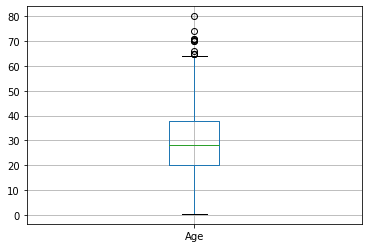

In [82]:
db.boxplot(column=['Age'])

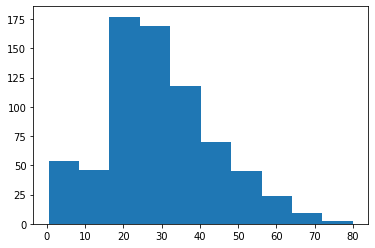

In [83]:
plt.hist(db['Age'])
plt.show()

We can see on the boxplot above that Age distribution has outliers, but data set isn't really skewed. Let's try mean value to replace NaN.

In [84]:
db_clean = db.copy()
db_clean['Age'] = db_clean['Age'].fillna(db.Age.mean())

Now it's time to replace NaN in categorical features. One method is to replace NaN with the most frequent category. We can use it to replace NaN in the feature Embarked, but for the feature Cabin it isn't very appropriate. Let's replace NaN in the Cabin feature in this way: let's pretend that NaN values are the new category of our feature.

In [85]:
db_clean['Embarked'] = db_clean['Embarked'].fillna(db_clean['Embarked'].value_counts().index[0])
db_clean['Cabin'] = db_clean['Cabin'].fillna('Unknown')

In [86]:
db_clean.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
Age group      0
dtype: int64

Now we don't have any NaN values in our data set. It's time to have a look at our distributions:

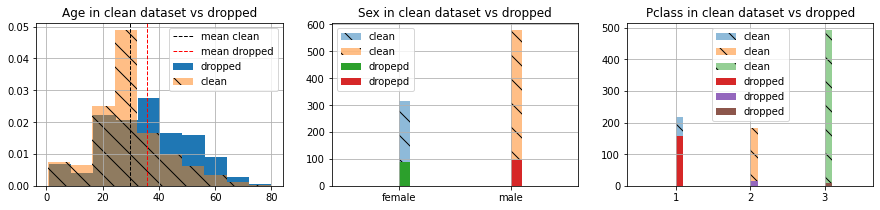

In [87]:
plt.figure(figsize=(15, 3))
plt.subplot(131)

db_dropped['Age'].hist(bins=10, density=True, label='dropped')
db_clean['Age'].hist(bins=10, density=True, label='clean', hatch='\\', alpha=0.5)
plt.axvline(db_clean['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean clean')
plt.axvline(db_dropped['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean dropped', c='r')
plt.legend()
plt.title('Age in clean dataset vs dropped')

plt.subplot(132)
db_clean.groupby('Sex')['Sex'].hist(hatch='\\', label='clean', alpha=0.5)
db_dropped.groupby('Sex')['Sex'].hist(label = 'dropepd')
plt.title('Sex')
plt.legend()
plt.title('Sex in clean dataset vs dropped')

plt.subplot(133)
db_clean.groupby('Pclass')['Pclass'].hist(hatch='\\', alpha=0.5, label='clean')
db_dropped.groupby('Pclass')['Pclass'].hist(label='dropped')
plt.title('Pclass in clean dataset vs dropped')
plt.xticks([1.0, 2.0, 3.0])
plt.legend()
plt.show()

plt.show()

Text(0.5, 1.0, 'Age in clean dataset vs original')

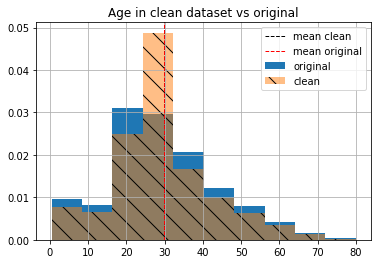

In [88]:
db['Age'].hist(bins=10, density=True, label='original')
db_clean['Age'].hist(bins=10, density=True, label='clean', hatch='\\', alpha=0.5)
plt.axvline(db_clean['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean clean')
plt.axvline(db['Age'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean original', c='r')
plt.legend()
plt.title('Age in clean dataset vs original')

### Great! Don't forget to submit before the deadline :)